### Importando as bibliotecas

In [2]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

'en_US.UTF-8'

### Lendo a base de dados

In [4]:
df = pd.read_csv("../datasets/Popularity of Programming Languages from 2004 to 2024.csv")
df.head(5)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,August 2004,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,September 2004,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,October 2004,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,November 2004,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


### Entendendo a base de dados

In [5]:
df.columns

Index(['Date', 'Abap', 'Ada', 'C/C++', 'C#', 'Cobol', 'Dart', 'Delphi/Pascal',
       'Go', 'Groovy', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Lua', 'Matlab', 'Objective-C', 'Perl', 'PHP', 'Powershell', 'Python',
       'R', 'Ruby', 'Rust', 'Scala', 'Swift', 'TypeScript', 'VBA',
       'Visual Basic'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Month Number'] = df['Date'].dt.month

df.head(5)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic,Year,Month,Month Number
0,2004-07-01,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.33,0.24,0.17,0.0,0.0,1.43,8.50,2004,July,7
1,2004-08-01,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.40,0.19,0.17,0.0,0.0,1.45,8.51,2004,August,8
2,2004-09-01,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.41,0.17,0.13,0.0,0.0,1.54,8.38,2004,September,9
3,2004-10-01,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.46,0.12,0.14,0.0,0.0,1.61,8.46,2004,October,10
4,2004-11-01,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.44,0.17,0.15,0.0,0.0,1.50,8.21,2004,November,11


### Qual linguagem teve a maior utilização dentro de todos os anos?

In [7]:
langs = ['Abap', 'Ada', 'C/C++', 'C#', 'Cobol', 'Dart', 'Delphi/Pascal',
       'Go', 'Groovy', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Lua', 'Matlab', 'Objective-C', 'Perl', 'PHP', 'Powershell', 'Python',
       'R', 'Ruby', 'Rust', 'Scala', 'Swift', 'TypeScript', 'VBA',
       'Visual Basic']

df['Max_Usage'] = df[langs].max(axis=1)
df['Max_Language'] = df[langs].idxmax(axis=1)

# df.groupby('Year').sort_values(by='Max_Usage',ascending=False)

df = df.groupby('Year').apply(lambda x: x.sort_values(by='Max_Usage', ascending=False).reset_index())

C:\Users\f034067\AppData\Local\Temp\ipykernel_21428\4017070042.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Year').apply(lambda x: x.sort_values(by='Max_Usage', ascending=False).reset_index())


In [8]:
df.head(20)

index       Date  Abap   Ada  C/C++    C#  Cobol  Dart  \
Year                                                              
2004 0       0 2004-07-01  0.34  0.36  10.01  4.68   0.42   0.0   
     1       1 2004-08-01  0.35  0.36   9.74  4.96   0.46   0.0   
     2       5 2004-12-01  0.36  0.37   9.53  5.22   0.53   0.0   
     3       2 2004-09-01  0.41  0.41   9.59  5.04   0.51   0.0   
     4       4 2004-11-01  0.38  0.38   9.48  5.22   0.55   0.0   
     5       3 2004-10-01  0.40  0.38   9.47  5.29   0.53   0.0   
2005 0       9 2005-04-01  0.34  0.36   9.83  5.41   0.41   0.0   
     1      11 2005-06-01  0.35  0.36   9.44  5.76   0.40   0.0   
     2      12 2005-07-01  0.33  0.34   9.28  6.16   0.39   0.0   
     3       7 2005-02-01  0.37  0.39   9.86  5.20   0.49   0.0   
     4      13 2005-08-01  0.32  0.30   9.14  6.14   0.40   0.0   
     5      16 2005-11-01  0.38  0.28   8.48  6.31   0.45   0.0   
     6      10 2005-05-01  0.35  0.37   9.70  5.61   0.40   0.0   
     7       8 2005-03-01  0.34  0.37   9.87  5.37   0.45   0.0   
     8      14 2005-09-01  0.36  0.29   9.04  6.17   0.40   0.0   
     9      15 2005-10-01  0.38  0.31   8.69  6.18   0.45   0.0   
     10     17 2005-12-01  0.39  0.28   8.37  6.53   0.48   0.0   
     11      6 2005-01-01  0.39  0.38   9.69  5.23   0.56   0.0   
2006 0      24 2006-07-01  0.35  0.22   8.46  6.64   0.46   0.0   
     1      23 2006-06-01  0.34  0.23   8.63  6.45   0.44   0.0   

         Delphi/Pascal   Go  ...  Scala  Swift  TypeScript   VBA  \
Year                         ...                                   
2004 0            2.80  0.0  ...   0.17    0.0        0.00  1.43   
     1            2.65  0.0  ...   0.17    0.0        0.00  1.45   
     2            2.76  0.0  ...   0.12    0.0        0.00  1.45   
     3            2.64  0.0  ...   0.13    0.0        0.00  1.54   
     4            2.75  0.0  ...   0.15    0.0        0.00  1.50   
     5            2.76  0.0  ...   0.14    0.0        0.00  1.61   
2005 0            2.55  0.0  ...   0.10    0.0        0.01  1.35   
     1            2.43  0.0  ...   0.09    0.0        0.06  1.55   
     2            2.50  0.0  ...   0.10    0.0        0.08  1.58   
     3            2.66  0.0  ...   0.09    0.0        0.01  1.45   
     4            2.35  0.0  ...   0.09    0.0        0.09  1.61   
     5            2.46  0.0  ...   0.02    0.0        0.07  1.64   
     6            2.49  0.0  ...   0.09    0.0        0.05  1.46   
     7            2.65  0.0  ...   0.11    0.0        0.01  1.44   
     8            2.32  0.0  ...   0.05    0.0        0.11  1.60   
     9            2.43  0.0  ...   0.05    0.0        0.11  1.69   
     10           2.44  0.0  ...   0.06    0.0        0.06  1.66   
     11           2.65  0.0  ...   0.09    0.0        0.00  1.50   
2006 0            1.91  0.0  ...   0.12    0.0        0.00  1.48   
     1            1.92  0.0  ...   0.13    0.0        0.06  1.48   

         Visual Basic  Year      Month  Month Number  Max_Usage  Max_Language  
Year                                                                           
2004 0           8.50  2004       July             7      30.16          Java  
     1           8.51  2004     August             8      29.80          Java  
     2           8.06  2004   December            12      29.69          Java  
     3           8.38  2004  September             9      29.59          Java  
     4           8.21  2004   November            11      29.48          Java  
     5           8.46  2004    October            10      29.02          Java  
2005 0           7.51  2005      April             4      30.50          Java  
     1           7.57  2005       June             6      30.34          Java  
     2           7.51  2005       July             7      30.29          Java  
     3           7.65  2005   February             2      30.24          Java  
     4           7.41  2005     August             8      30.21          Java

### Gráfico que mostra as linguagens mais usadas

In [9]:
df.reset_index(drop=True, inplace=True)
df.drop(columns=['index'])

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Scala,Swift,TypeScript,VBA,Visual Basic,Year,Month,Month Number,Max_Usage,Max_Language
0,2004-07-01,0.34,0.36,10.01,4.68,0.42,0.00,2.80,0.00,0.03,...,0.17,0.00,0.00,1.43,8.50,2004,July,7,30.16,Java
1,2004-08-01,0.35,0.36,9.74,4.96,0.46,0.00,2.65,0.00,0.07,...,0.17,0.00,0.00,1.45,8.51,2004,August,8,29.80,Java
2,2004-12-01,0.36,0.37,9.53,5.22,0.53,0.00,2.76,0.00,0.09,...,0.12,0.00,0.00,1.45,8.06,2004,December,12,29.69,Java
3,2004-09-01,0.41,0.41,9.59,5.04,0.51,0.00,2.64,0.00,0.08,...,0.13,0.00,0.00,1.54,8.38,2004,September,9,29.59,Java
4,2004-11-01,0.38,0.38,9.48,5.22,0.55,0.00,2.75,0.00,0.07,...,0.15,0.00,0.00,1.50,8.21,2004,November,11,29.48,Java
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2024-05-01,0.56,0.94,6.47,6.73,0.21,1.01,0.07,2.19,0.27,...,0.60,2.72,2.89,0.91,0.37,2024,May,5,28.91,Python
242,2024-04-01,0.56,1.01,6.56,6.71,0.17,1.03,0.13,2.14,0.27,...,0.60,2.70,2.86,0.88,0.37,2024,April,4,28.61,Python
243,2024-03-01,0.54,1.02,6.76,6.63,0.21,1.05,0.14,2.15,0.30,...,0.59,2.73,2.83,0.85,0.38,2024,March,3,28.34,Python
244,2024-02-01,0.53,1.05,6.87,6.69,0.23,1.04,0.15,2.13,0.30,...,0.60,2.66,2.79,0.86,0.38,2024,February,2,28.19,Python


In [10]:
df_max = df.loc[df.groupby('Year')['Max_Usage'].idxmax()].reset_index(drop=True)
df_max.drop(columns=['index'])

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Scala,Swift,TypeScript,VBA,Visual Basic,Year,Month,Month Number,Max_Usage,Max_Language
0,2004-07-01,0.34,0.36,10.01,4.68,0.42,0.00,2.80,0.00,0.03,...,0.17,0.00,0.00,1.43,8.50,2004,July,7,30.16,Java
1,2005-04-01,0.34,0.36,9.83,5.41,0.41,0.00,2.55,0.00,0.08,...,0.10,0.00,0.01,1.35,7.51,2005,April,4,30.50,Java
2,2006-07-01,0.35,0.22,8.46,6.64,0.46,0.00,1.91,0.00,0.09,...,0.12,0.00,0.00,1.48,6.23,2006,July,7,30.35,Java
3,2007-10-01,0.36,0.20,8.04,6.94,0.34,0.00,1.73,0.07,0.10,...,0.12,0.00,0.03,1.66,5.12,2007,October,10,30.70,Java
4,2008-01-01,0.38,0.30,8.04,6.96,0.39,0.00,1.63,0.05,0.23,...,0.33,0.00,0.18,1.66,5.13,2008,January,1,30.39,Java
5,2009-04-01,0.35,0.23,8.62,7.62,0.35,0.00,1.67,0.07,0.40,...,0.19,0.00,0.05,1.87,5.45,2009,April,4,28.38,Java
6,2010-04-01,0.53,0.13,11.25,6.16,0.48,0.00,1.26,0.03,0.37,...,0.20,0.00,0.00,2.30,5.35,2010,April,4,28.45,Java
7,2011-01-01,0.62,0.26,12.21,6.39,0.48,0.00,1.18,0.04,0.33,...,0.31,0.00,0.00,2.32,4.98,2011,January,1,28.45,Java
8,2012-01-01,0.72,0.23,11.94,6.40,0.37,0.08,0.96,0.03,0.37,...,0.38,0.00,0.03,2.16,4.15,2012,January,1,27.60,Java
9,2013-02-01,0.60,0.28,8.61,9.48,0.31,0.08,0.81,0.08,0.34,...,0.42,0.00,0.01,1.81,3.62,2013,February,2,26.68,Java


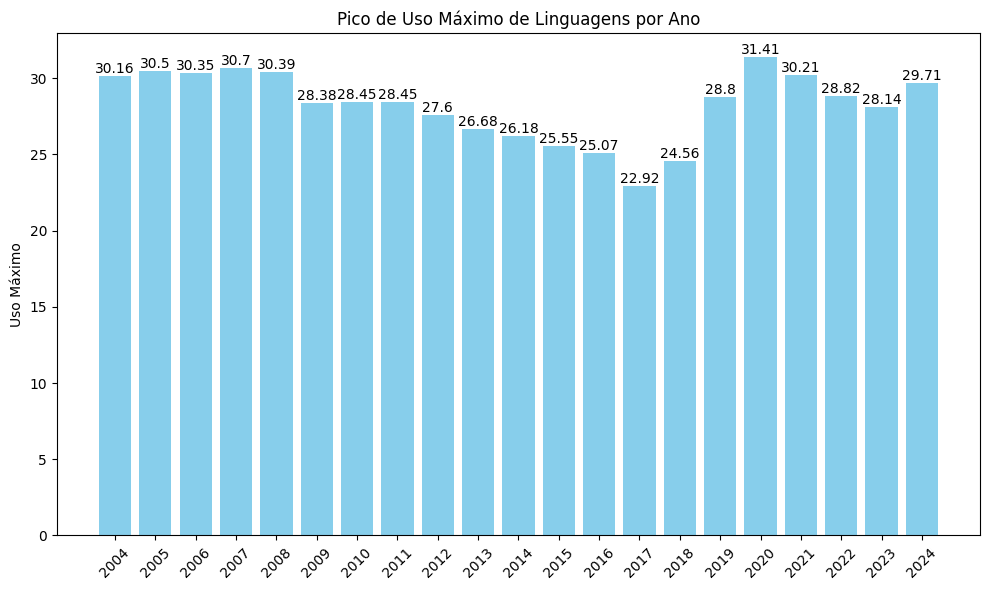

In [11]:
# Gráfico

plt.figure(figsize=(10,6))
bars = plt.bar(df_max['Year'], df_max['Max_Usage'], color='skyblue')
plt.ylabel('Uso Máximo')
plt.title('Pico de Uso Máximo de Linguagens por Ano')
plt.xticks(df_max['Year'], rotation=45)

plt.bar_label(bars)

plt.tight_layout()
plt.show();

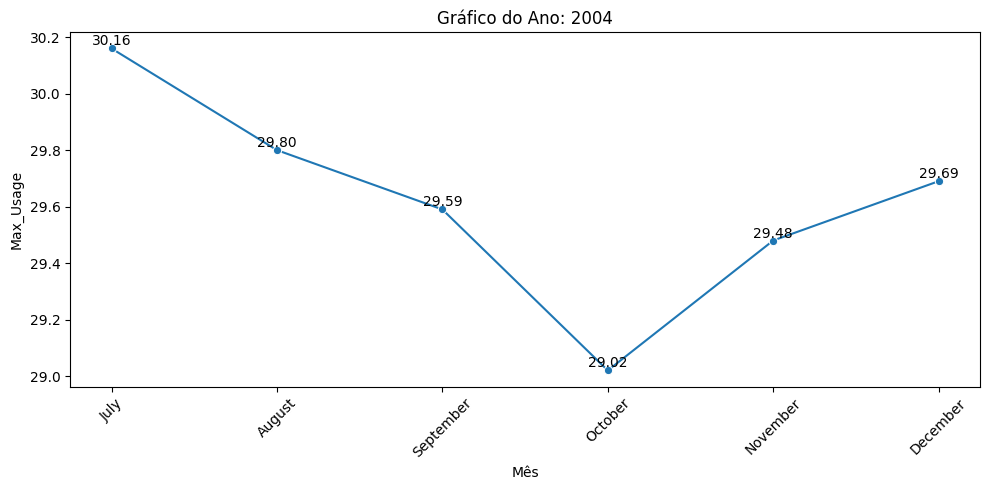

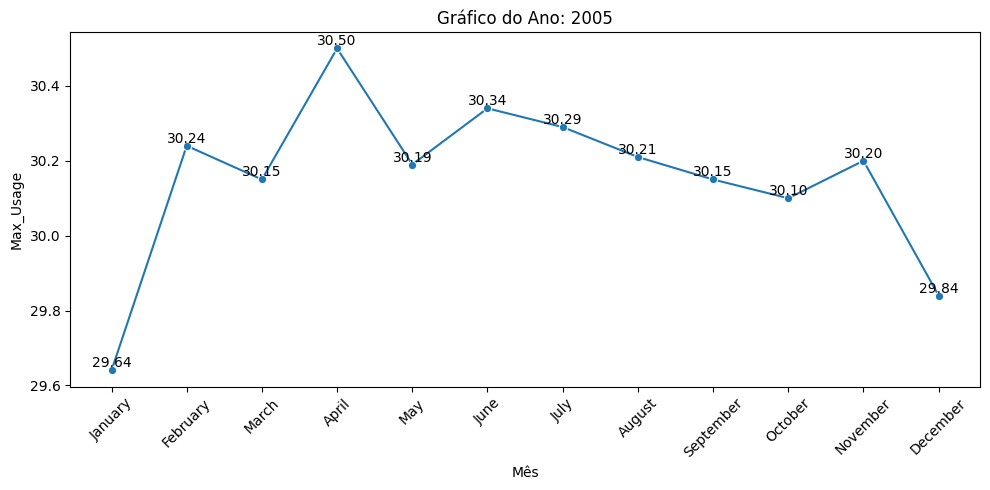

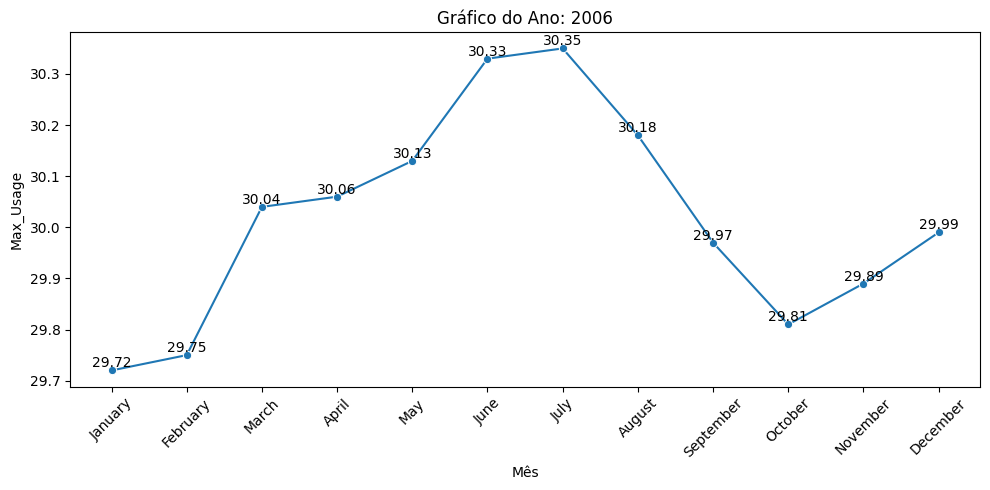

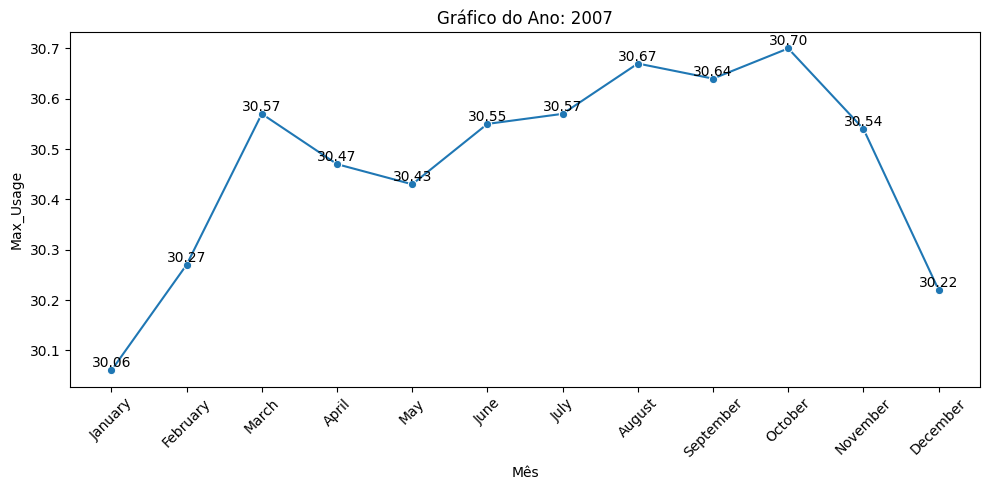

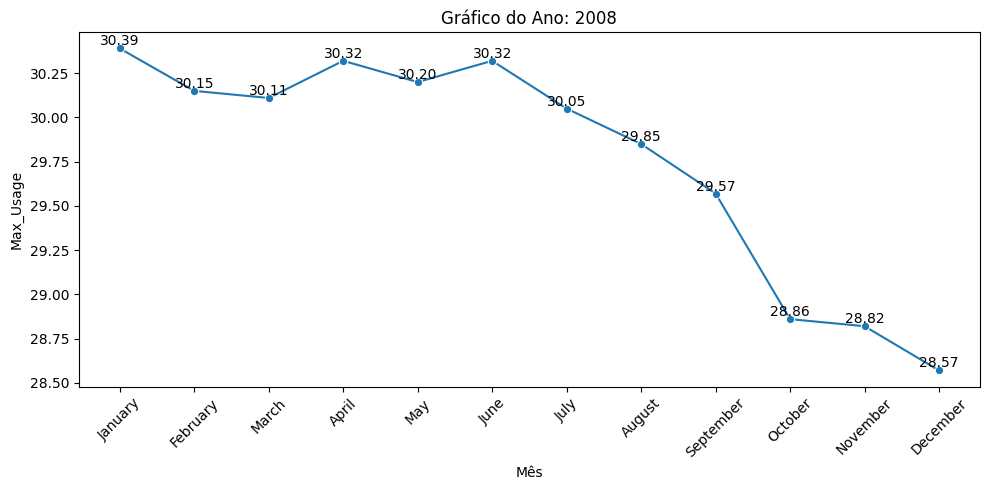

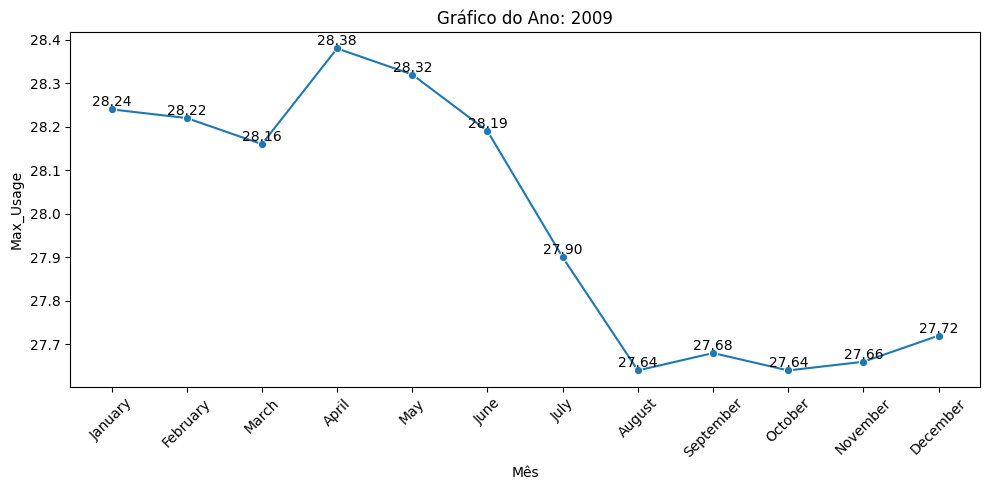

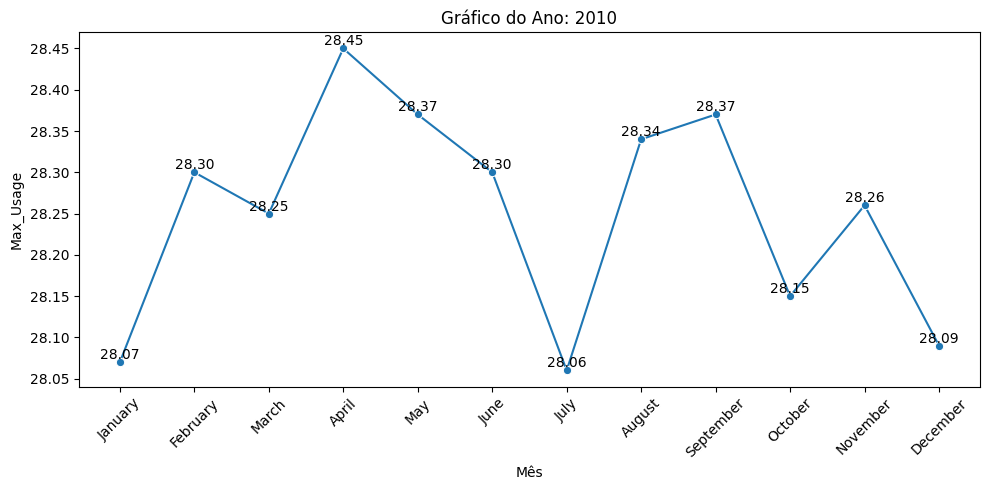

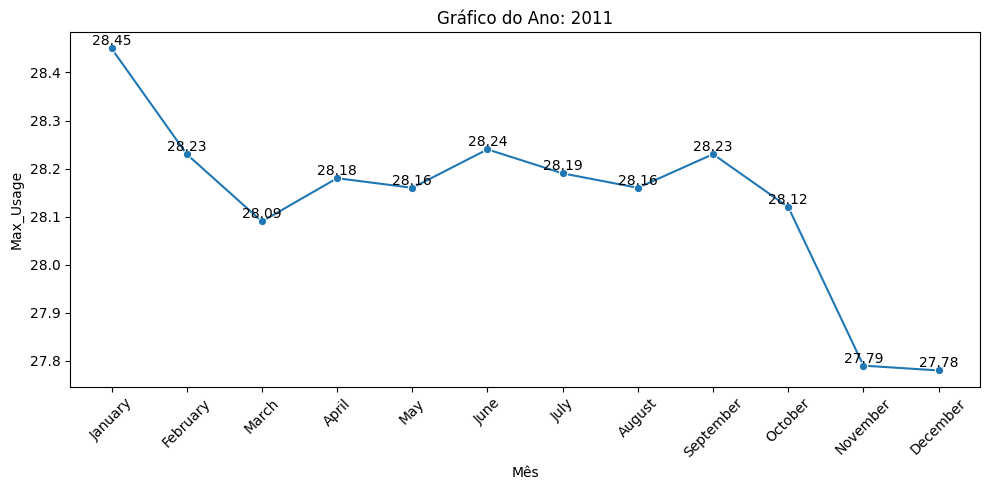

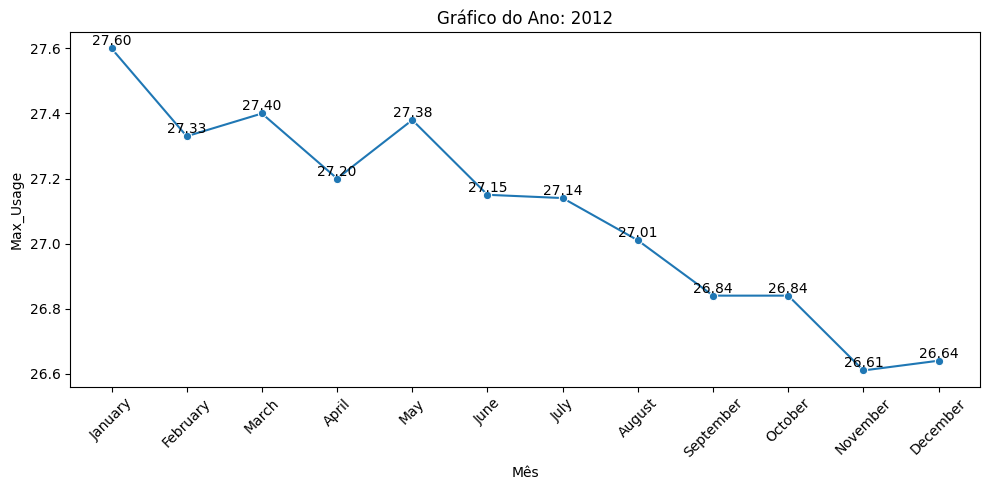

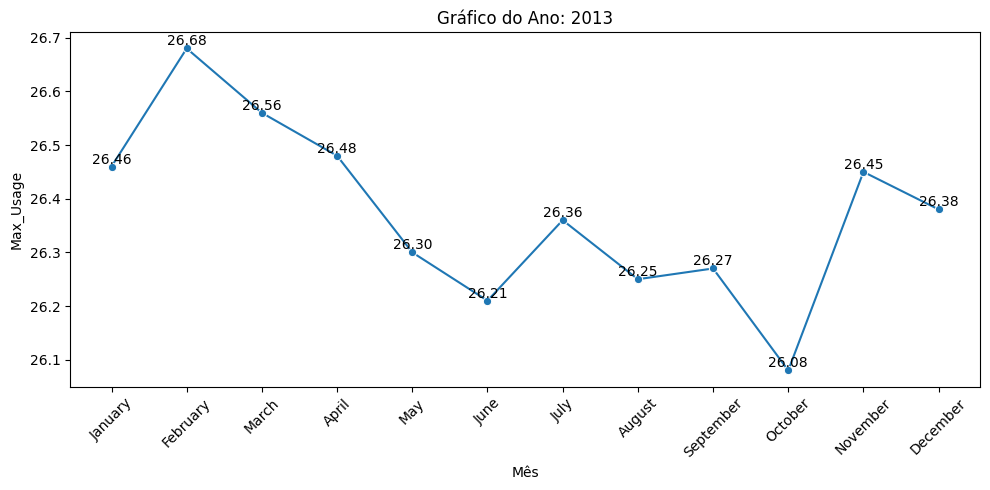

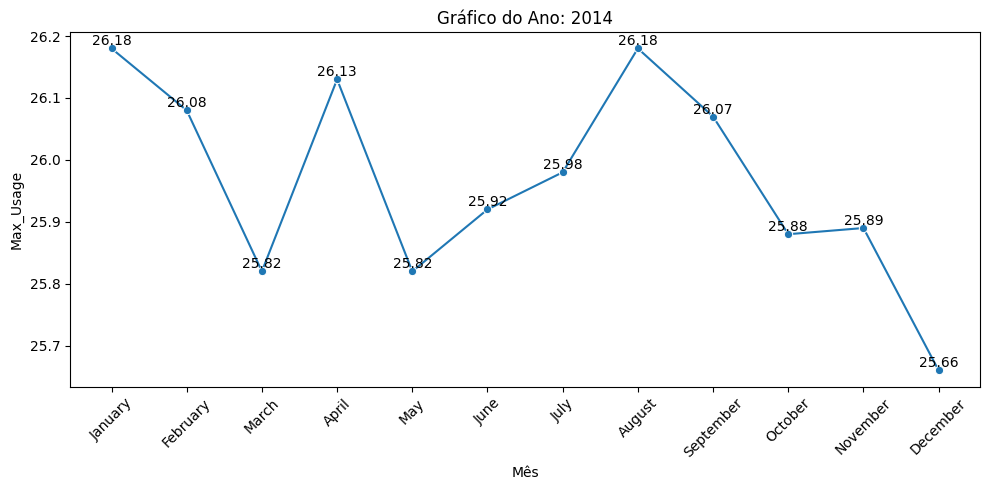

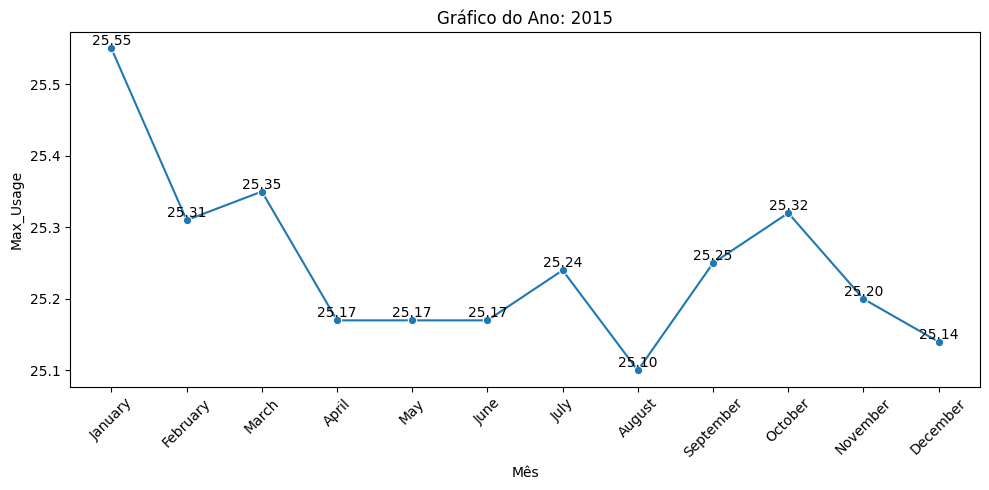

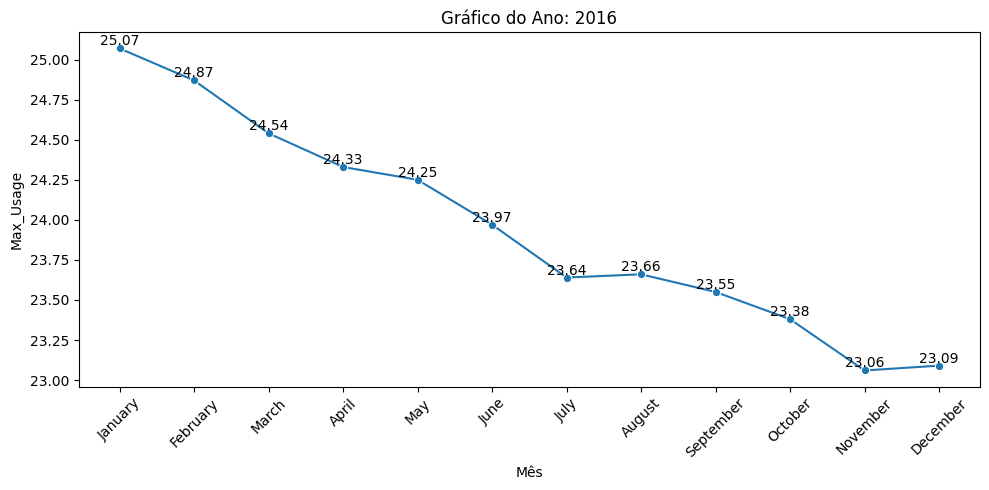

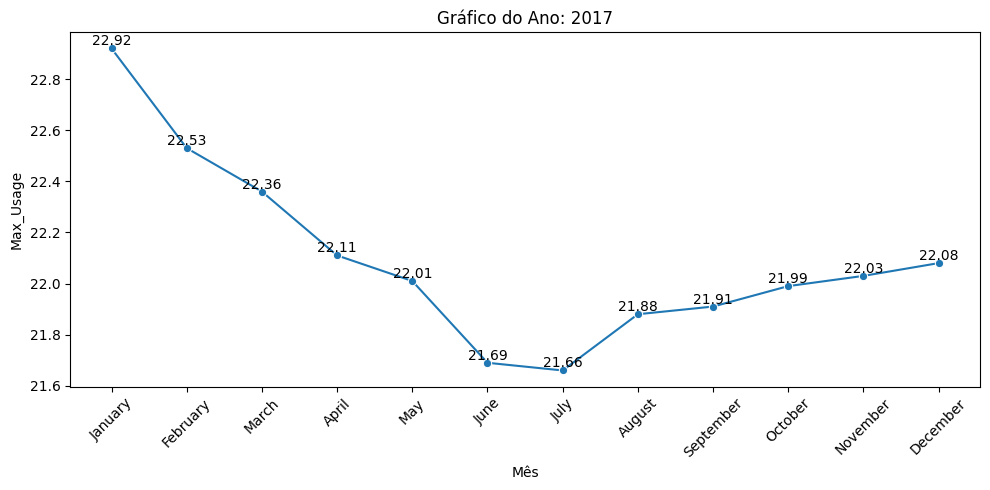

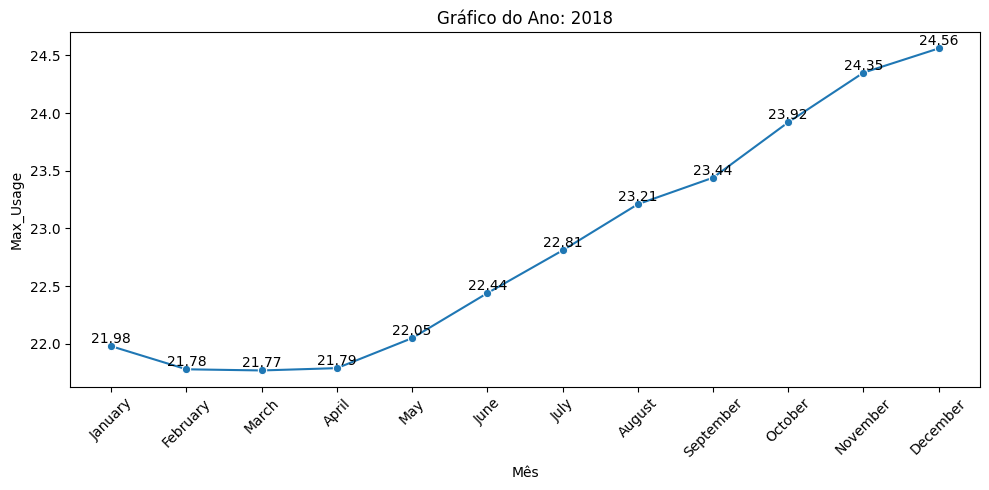

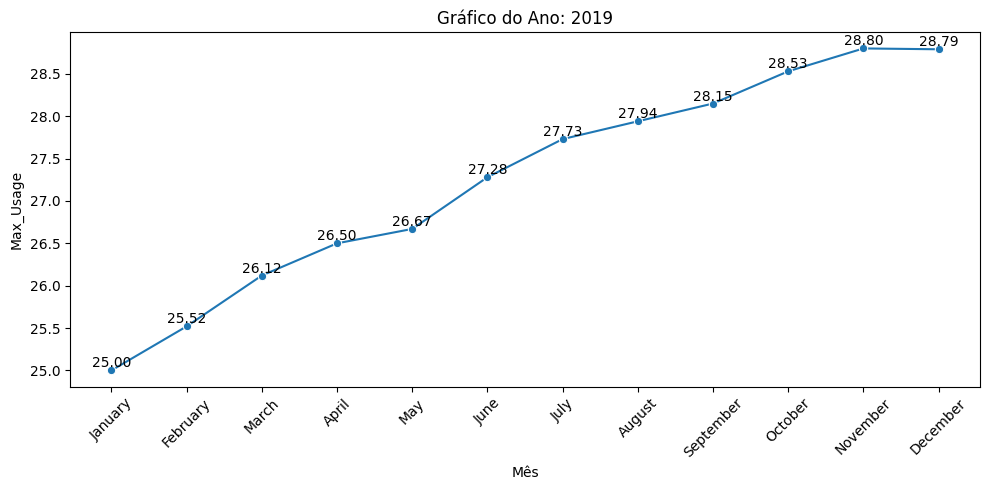

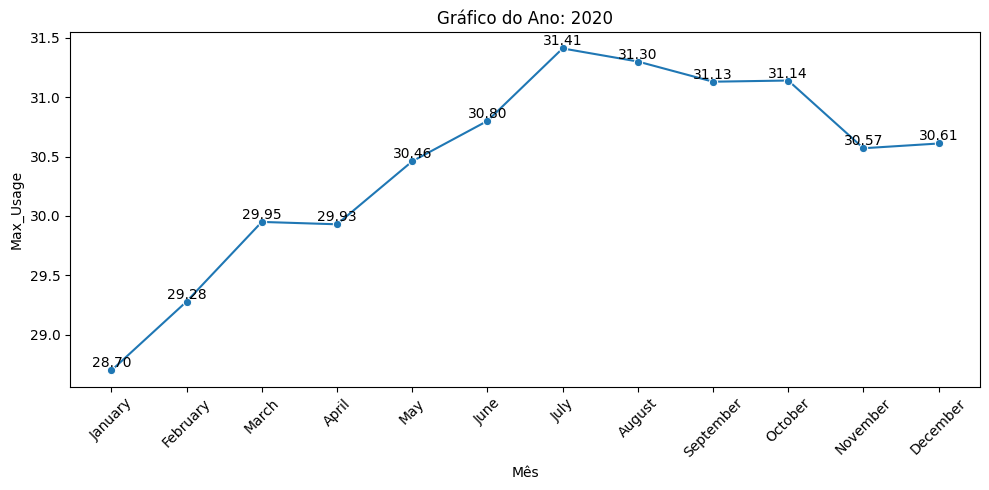

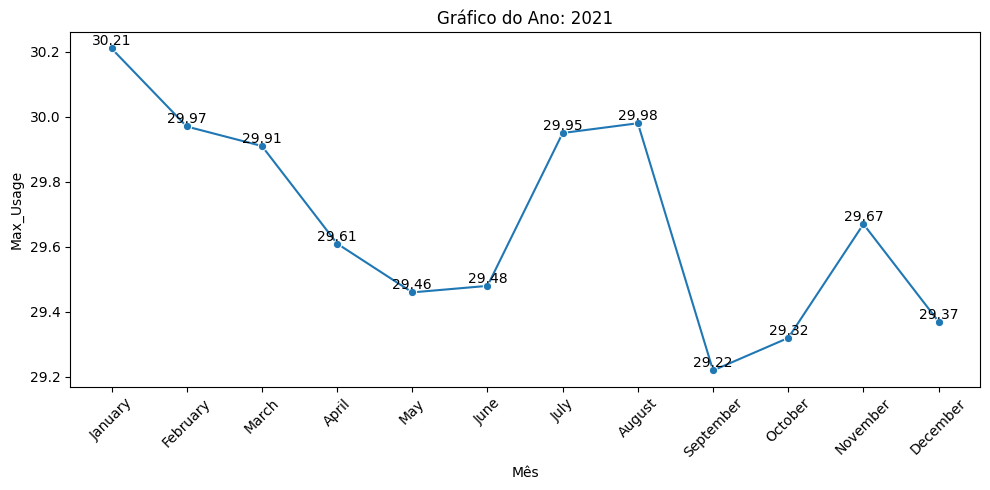

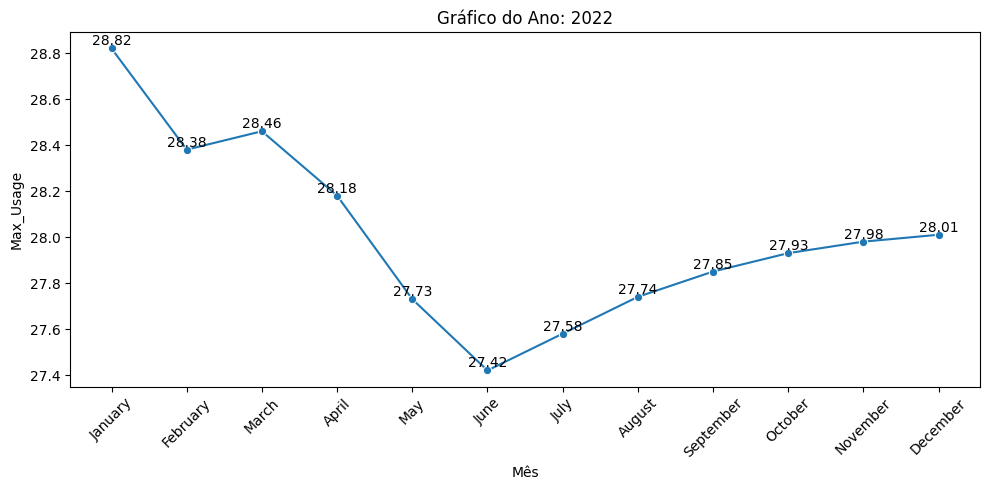

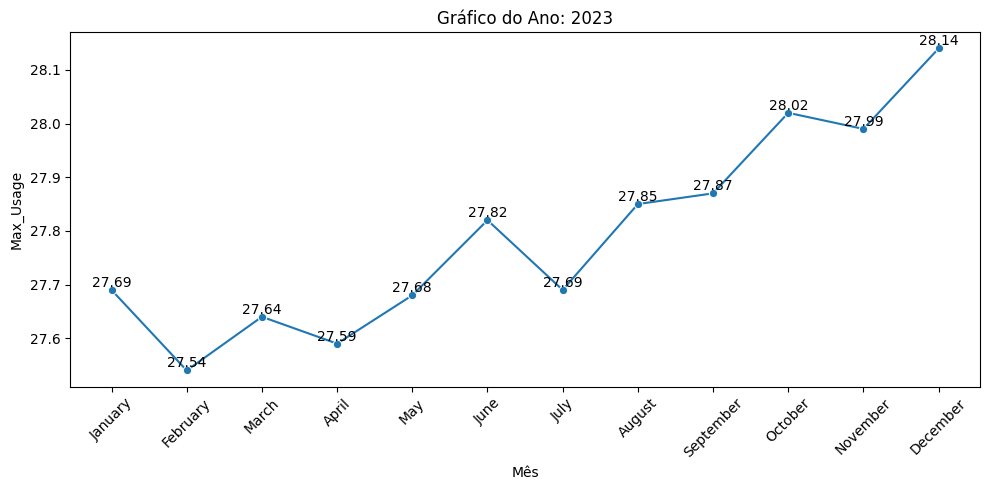

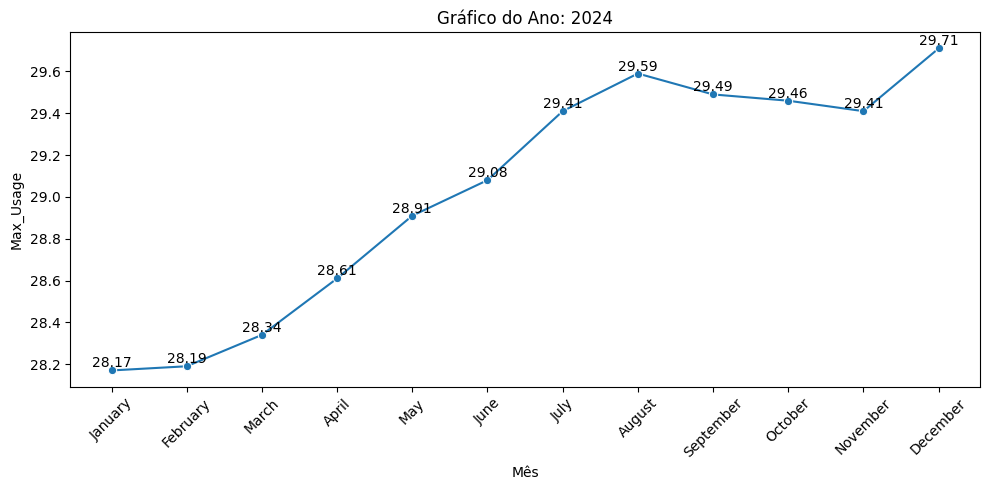

In [12]:
anos = df['Year'].unique()

for ano in sorted(anos):
    df_ano = df[df['Year'] == ano].sort_values('Month Number')
    
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x='Month', y='Max_Usage', data=df_ano, marker='o')
    
    for i, (_, row) in enumerate(df_ano.iterrows()):
        ax.text(i, row['Max_Usage'], f"{row['Max_Usage']:.2f}", 
                color='black', ha='center', va='bottom')
    
    plt.title(f'Gráfico do Ano: {ano}')
    plt.xlabel('Mês')
    plt.ylabel('Max_Usage')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()